# Performance of Classifiers in detecting Breast Cancer

### Aidin Hosseini 98103115


### tasks:
1. [Load the data](#importing-breast-cancer-dataset--pre-processing)
1. [Guassian Naive Bayes](#guassian-naive-bayes-classifier)
1. [K-Nearest Neighbors](#k-nearest-neighbors)
1. [Comparison of the classifiers](#comparison-of-the-classifiers)
1. [Conclusion](#conclusion)

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

### Importing breast cancer dataset & pre processing
&nbsp;In the documentation of SVM in sklearn, it's recommended to use standScaler to pre process the data

In [172]:
# importing the dataset
cancer_data = load_breast_cancer()
# splitting the dataset into training and testing. test size = 0.2
train_data, test_data, train_class, test_class = train_test_split(cancer_data.data, cancer_data.target, test_size=0.2, random_state=20) # type: ignore

#scaling train and test data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

#converting into pandas dataframe
train_df = pd.DataFrame(np.c_[train_data, train_class], columns=np.append(cancer_data.feature_names, ['class'])) # type: ignore
test_df = pd.DataFrame(np.c_[test_data, test_class], columns=np.append(cancer_data.feature_names, ['class'])) # type: ignore

# printing train and test data
print(train_df.shape)
print(train_df.head())

(455, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -1.344500      0.534636       -1.323252  -1.089323        -1.166658   
1     3.775004      1.582094        3.896492   5.203784         0.926813   
2    -0.127897     -0.686259       -0.173390  -0.224662        -0.212893   
3     0.210127      0.199175        0.169804   0.072485         0.013152   
4     0.488500      1.052660        0.480977   0.359484        -0.851653   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0         -0.814504       -0.623548            -1.105909      -1.933056   
1          1.827672        3.402674             3.121590       0.935233   
2         -0.584816       -0.868343            -0.752989      -0.631939   
3         -0.376530       -0.242220             0.039738      -1.156759   
4         -0.056458        0.142193             0.146347       0.155291   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0   

In [173]:
print(test_df.shape)
print(test_df.head())

(114, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.971537      0.240252       -0.922996  -0.874779         0.912229   
1     0.420327      0.009765        0.329085   0.291540        -1.260722   
2     1.278170      1.317377        1.347171   1.220198         0.780977   
3    -0.605108      2.029375       -0.624549  -0.599621        -0.825403   
4     0.016970      1.020711        0.036385  -0.125425        -0.077266   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.491966       -0.041743            -0.498212      -0.497089   
1         -0.898010       -0.565034            -0.503374      -0.938084   
2          1.634673        1.778112             1.972897       1.379872   
3         -0.738642       -0.584045            -0.736210      -0.690253   
4          0.524451        0.291811             0.429777       1.569391   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0   

In [174]:
print('train df Nans: ',train_df.isna().sum().sum())
print('test df Nans',test_df.isna().sum().sum())


train df Nans:  0
test df Nans 0


<span style="color : #ff8c00">dataframes are only used for visualization.
 </span>

## Guassian Naive Bayes classifier

### Gussian Naive Bayes classifier (train set)

In [175]:
#gussian naive bayes

gnb = GaussianNB()
gnb.fit(train_data, train_class)

gnb_pred_train = gnb.predict(train_data)
# accuracy
print("Gaussian Naive Bayes Train Accuracy:", metrics.accuracy_score(train_class, gnb_pred_train))
# recall
print("Gaussian Naive Bayes Train Recall:", metrics.recall_score(train_class, gnb_pred_train))
# precision
print("Gaussian Naive Bayes Train Precision:", metrics.precision_score(train_class, gnb_pred_train))
# f1 score
print("Gaussian Naive Bayes Train F1 Score:", metrics.f1_score(train_class, gnb_pred_train))




Gaussian Naive Bayes Train Accuracy: 0.9318681318681319
Gaussian Naive Bayes Train Recall: 0.9553264604810997
Gaussian Naive Bayes Train Precision: 0.9391891891891891
Gaussian Naive Bayes Train F1 Score: 0.9471890971039183


### Gaussin Naive Bayes classifier Confusion matrix (train set)

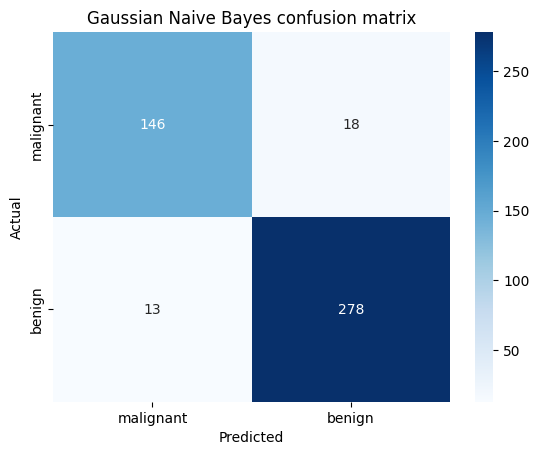

In [176]:
# confusion matrix
sns.heatmap(metrics.confusion_matrix(train_class, gnb_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title('Gaussian Naive Bayes confusion matrix')
plt.xticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.yticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Guassin Naive Bayes classifier (test set)

In [177]:
gnb_prediction = gnb.predict(test_data)
# accuracy
gnb_accuracy = metrics.accuracy_score(test_class, gnb_prediction)
print("Gaussian Naive Bayes Test accuracy: ", gnb_accuracy)
# recall
gnb_recall = metrics.recall_score(test_class, gnb_prediction)
print("Gaussian Naive Bayes Test recall: ", gnb_recall)
# precision
gnb_precision = metrics.precision_score(test_class, gnb_prediction)
print("Gaussian Naive Bayes Test precision: ", gnb_precision)
# f1 score
gnb_f1 = metrics.f1_score(test_class, gnb_prediction)
print("Gaussian Naive Bayes Test f1 score: ", gnb_f1)

# confusion matrix
gnb_confusion_matrix = metrics.confusion_matrix(test_class, gnb_prediction)

Gaussian Naive Bayes Test accuracy:  0.9298245614035088
Gaussian Naive Bayes Test recall:  0.9393939393939394
Gaussian Naive Bayes Test precision:  0.9393939393939394
Gaussian Naive Bayes Test f1 score:  0.9393939393939394


### Guassian Naive Bayes classifier Confusion matrix (test set)

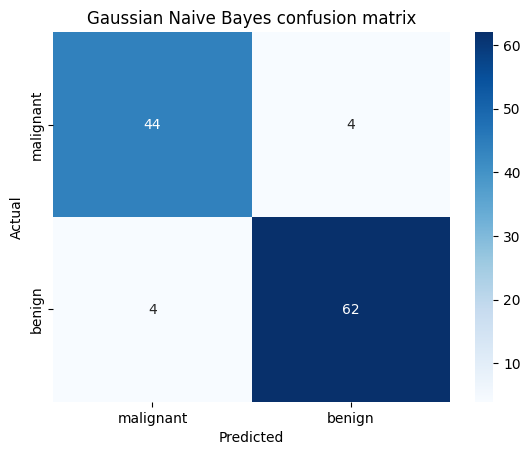

In [178]:
#confusion matrix
sns.heatmap(gnb_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Gaussian Naive Bayes confusion matrix')

plt.xticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.yticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Support Vector Machine

### Support Vector Machine (train set)
we only studied linear SVMs in class so we will use that.

In [179]:
# use svm
svm = SVC(kernel='linear') # we only studied linear SVMs in class so we will use that
svm.fit(train_data, train_class)

svm_pred_train = svm.predict(train_data)

# accuracy
print("SVM Train Accuracy:", metrics.accuracy_score(train_class, svm_pred_train))
# recall
print("SVM Train Recall:", metrics.recall_score(train_class, svm_pred_train))
# precision
print("SVM Train Precision:", metrics.precision_score(train_class, svm_pred_train))
# f1 score
print("SVM Train F1 Score:", metrics.f1_score(train_class, svm_pred_train))


SVM Train Accuracy: 0.9868131868131869
SVM Train Recall: 0.993127147766323
SVM Train Precision: 0.9863481228668942
SVM Train F1 Score: 0.9897260273972602


### Support Vector Machine Confusion matrix (train set)

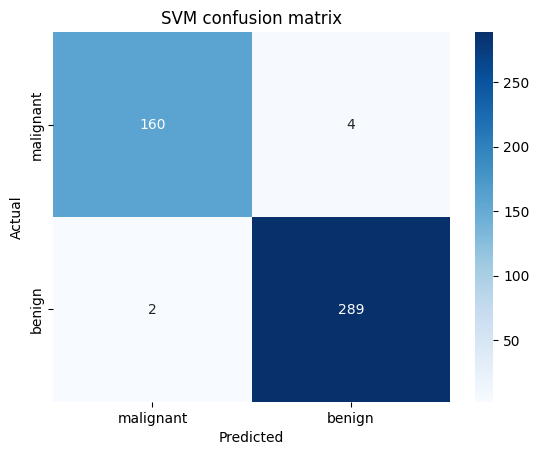

In [180]:
# confusion matrix
sns.heatmap(metrics.confusion_matrix(train_class, svm_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title('SVM confusion matrix')
plt.xticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.yticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Support Vector Machine (test set)

In [181]:
# predict on test data
svm_prediction = svm.predict(test_data)
# accuracy
svm_accuracy = metrics.accuracy_score(test_class, svm_prediction)
print("SVM Test accuracy: ", svm_accuracy)
# recall
svm_recall = metrics.recall_score(test_class, svm_prediction)
print("SVM Test recall: ", svm_recall)
# precision
svm_precision = metrics.precision_score(test_class, svm_prediction)
print("SVM Test precision: ", svm_precision)
# f1 score
svm_f1 = metrics.f1_score(test_class, svm_prediction)
print("SVM Test f1 score: ", svm_f1)


SVM Test accuracy:  0.9912280701754386
SVM Test recall:  1.0
SVM Test precision:  0.9850746268656716
SVM Test f1 score:  0.9924812030075187


### Support Vector Machine Confusion matrix (test set)

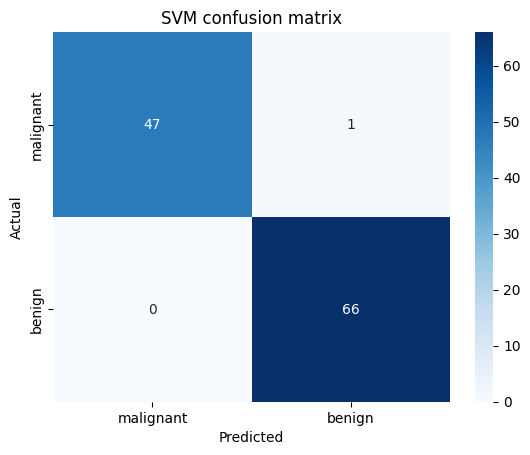

In [182]:
# confusion matrix
sns.heatmap(metrics.confusion_matrix(test_class, svm_prediction), annot=True, fmt='d', cmap='Blues')
plt.title('SVM confusion matrix')
plt.xticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.yticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## k-Nearest Neighbors

### k-NN classifier k=3 (test set)

In [183]:

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(train_data, train_class)

knn3_pred_train = knn3.predict(train_data)

# accuracy
print("k-NN Train Accuracy:", metrics.accuracy_score(train_class, knn3_pred_train))
# recall
print("k-NN Train Recall:", metrics.recall_score(train_class, knn3_pred_train))
# precision
print("k-NN Train Precision:", metrics.precision_score(train_class, knn3_pred_train))
# f1 score
print("k-NN Train F1 Score:", metrics.f1_score(train_class, knn3_pred_train))



k-NN Train Accuracy: 0.9758241758241758
k-NN Train Recall: 0.993127147766323
k-NN Train Precision: 0.9697986577181208
k-NN Train F1 Score: 0.9813242784380305


### k-NN classifier k=3 Confusion matrix (test set)

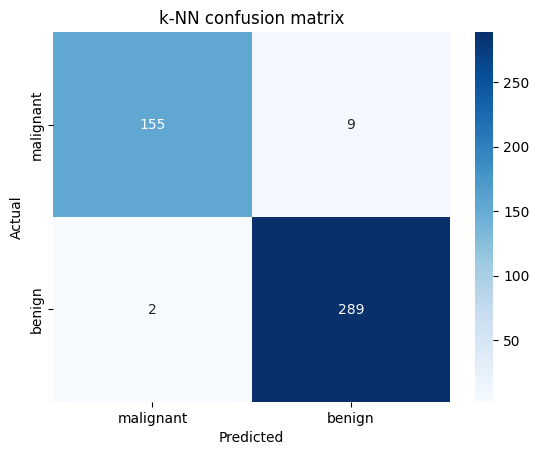

In [184]:
# confusion matrix
sns.heatmap(metrics.confusion_matrix(train_class, knn3_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title('k-NN confusion matrix')
plt.xticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.yticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### k-NN classifier k=3 (test set)

In [185]:
knn3_prediction = knn3.predict(test_data)
# accuracy
knn3_accuracy = metrics.accuracy_score(test_class, knn3_prediction)
print("k-NN Test accuracy: ", knn3_accuracy)
# recall
knn3_recall = metrics.recall_score(test_class, knn3_prediction)
print("k-NN Test recall: ", knn3_recall)
# precision
knn3_precision = metrics.precision_score(test_class, knn3_prediction)
print("k-NN Test precision: ", knn3_precision)
# f1 score
knn3_f1 = metrics.f1_score(test_class, knn3_prediction)
print("k-NN Test f1 score: ", knn3_f1)


k-NN Test accuracy:  0.9473684210526315
k-NN Test recall:  0.9696969696969697
k-NN Test precision:  0.9411764705882353
k-NN Test f1 score:  0.955223880597015


### k-NN classifier k=3 Confusion matrix (test set)

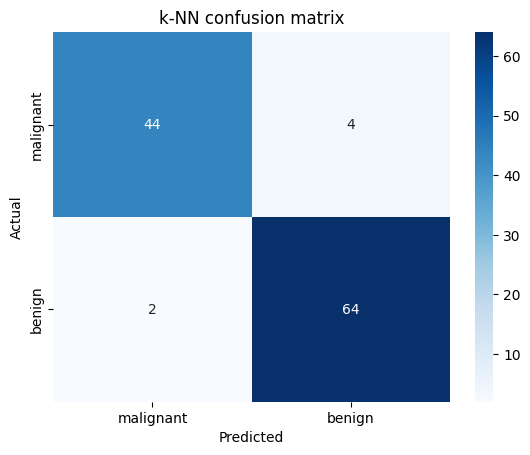

In [186]:
# confusion matrix
sns.heatmap(metrics.confusion_matrix(test_class, knn3_prediction), annot=True, fmt='d', cmap='Blues')
plt.title('k-NN confusion matrix')
plt.xticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.yticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### k-NN classifier k=5 (train set)

In [187]:
# knn with k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(train_data, train_class)

knn5_pred_train = knn5.predict(train_data)

# accuracy
print("k-NN Train Accuracy:", metrics.accuracy_score(train_class, knn5_pred_train))
# recall
print("k-NN Train Recall:", metrics.recall_score(train_class, knn5_pred_train))
# precision
print("k-NN Train Precision:", metrics.precision_score(train_class, knn5_pred_train))
# f1 score
print("k-NN Train F1 Score:", metrics.f1_score(train_class, knn5_pred_train))


k-NN Train Accuracy: 0.9714285714285714
k-NN Train Recall: 0.9862542955326461
k-NN Train Precision: 0.9695945945945946
k-NN Train F1 Score: 0.9778534923339012


### k-NN classifier k=5 Confusion matrix (train set)

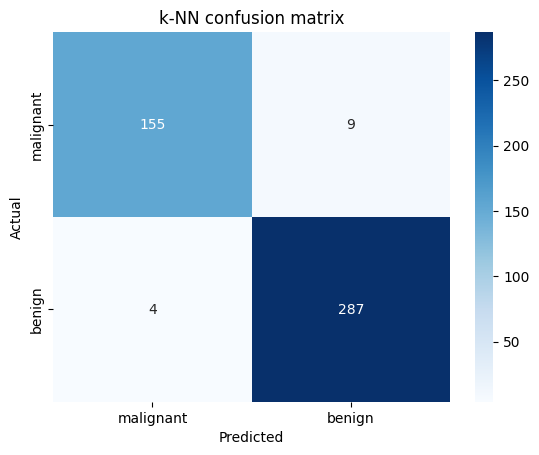

In [188]:
# confusion matrix
sns.heatmap(metrics.confusion_matrix(train_class, knn5_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title('k-NN confusion matrix')
plt.xticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.yticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### k-NN classifier k=5 (test set)

In [189]:
knn5_prediction = knn5.predict(test_data)
# accuracy
knn5_accuracy = metrics.accuracy_score(test_class, knn5_prediction)
print("k-NN Test accuracy: ", knn5_accuracy)
# recall
knn5_recall = metrics.recall_score(test_class, knn5_prediction)
print("k-NN Test recall: ", knn5_recall)
# precision
knn5_precision = metrics.precision_score(test_class, knn5_prediction)
print("k-NN Test precision: ", knn5_precision)
# f1 score
knn5_f1 = metrics.f1_score(test_class, knn5_prediction)
print("k-NN Test f1 score: ", knn5_f1)


k-NN Test accuracy:  0.956140350877193
k-NN Test recall:  0.9696969696969697
k-NN Test precision:  0.9552238805970149
k-NN Test f1 score:  0.9624060150375939


### k-NN classifier k=5 Confusion matrix (test set)

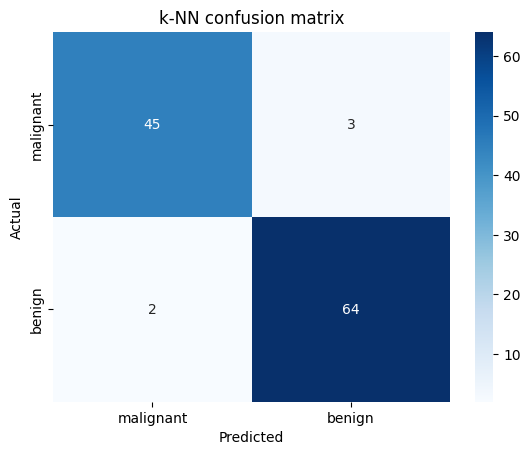

In [190]:
# confusion matrix
sns.heatmap(metrics.confusion_matrix(test_class, knn5_prediction), annot=True, fmt='d', cmap='Blues')
plt.title('k-NN confusion matrix')
plt.xticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.yticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### k-NN classifier k=7 (train set)

In [191]:
# knn with k=7
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(train_data, train_class)

knn7_pred_train = knn7.predict(train_data)

# accuracy
print("k-NN Train Accuracy:", metrics.accuracy_score(train_class, knn7_pred_train))
# recall
print("k-NN Train Recall:", metrics.recall_score(train_class, knn7_pred_train))
# precision
print("k-NN Train Precision:", metrics.precision_score(train_class, knn7_pred_train))
# f1 score
print("k-NN Train F1 Score:", metrics.f1_score(train_class, knn7_pred_train))


k-NN Train Accuracy: 0.967032967032967
k-NN Train Recall: 0.9862542955326461
k-NN Train Precision: 0.9630872483221476
k-NN Train F1 Score: 0.9745331069609509


### k-NN classifier k=7 Confusion matrix (train set)

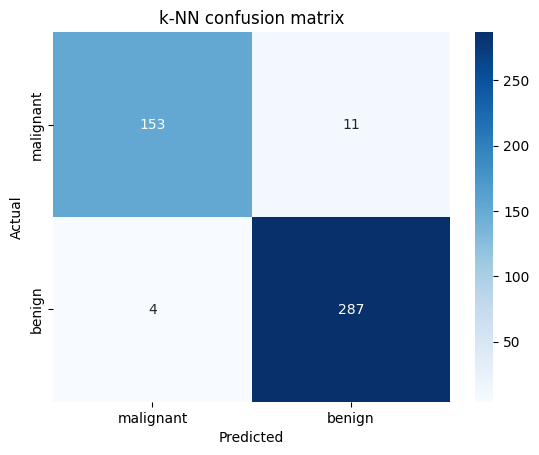

In [192]:
# confusion matrix
sns.heatmap(metrics.confusion_matrix(train_class, knn7_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title('k-NN confusion matrix')
plt.xticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.yticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### k-NN classifier k=7 (test set)

In [193]:
knn7_prediction = knn7.predict(test_data)
# accuracy
knn7_accuracy = metrics.accuracy_score(test_class, knn7_prediction)
print("k-NN Test accuracy: ", knn7_accuracy)
# recall
knn7_recall = metrics.recall_score(test_class, knn7_prediction)
print("k-NN Test recall: ", knn7_recall)
# precision
knn7_precision = metrics.precision_score(test_class, knn7_prediction)
print("k-NN Test precision: ", knn7_precision)
# f1 score
knn7_f1 = metrics.f1_score(test_class, knn7_prediction)
print("k-NN Test f1 score: ", knn7_f1)


k-NN Test accuracy:  0.9649122807017544
k-NN Test recall:  0.9848484848484849
k-NN Test precision:  0.9558823529411765
k-NN Test f1 score:  0.9701492537313432


### k-NN classifier k=7 Confusion matirx (test set)

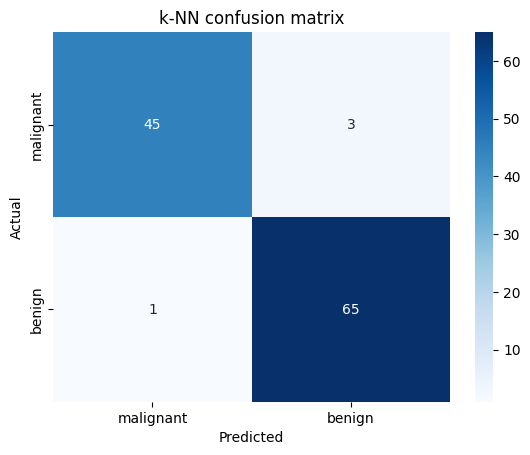

In [194]:
# confusion matrix
sns.heatmap(metrics.confusion_matrix(test_class, knn7_prediction), annot=True, fmt='d', cmap='Blues')
plt.title('k-NN confusion matrix')
plt.xticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.yticks(np.arange(2)+0.5, cancer_data.target_names) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 

# Comparison of the classifiers

## Accuracy of the Classifiers

In [195]:
# print accuracy , recall of train and test data for all models
print("knn (k=3):")
print(" test accuracy: ", knn3_accuracy, " train accuracy:", metrics.accuracy_score(train_class, knn3_pred_train))
print("knn (k=5):")
print(" test accuracy: ", knn5_accuracy, " train accuracy:", metrics.accuracy_score(train_class, knn5_pred_train))
print("knn (k=7):")
print(" test accuracy: ", knn7_accuracy, " train accuracy:", metrics.accuracy_score(train_class, knn7_pred_train))
print("Naive Bayes:")
print(" test accuracy: ", gnb_accuracy, " train accuracy:", metrics.accuracy_score(train_class, gnb_pred_train))
print("linear SVM:")
print(" test accuracy: ", svm_accuracy, " train accuracy:", metrics.accuracy_score(train_class, svm_pred_train))




knn (k=3):
 test accuracy:  0.9473684210526315  train accuracy: 0.9758241758241758
knn (k=5):
 test accuracy:  0.956140350877193  train accuracy: 0.9714285714285714
knn (k=7):
 test accuracy:  0.9649122807017544  train accuracy: 0.967032967032967
Naive Bayes:
 test accuracy:  0.9298245614035088  train accuracy: 0.9318681318681319
linear SVM:
 test accuracy:  0.9912280701754386  train accuracy: 0.9868131868131869


Based on the accuracy, the performance of the classifiers are as follow:<br>
* Linear SVM has the highest accuracy on both training and test section.
* the k-NN classifier with k=7 seems to have better performance with the shuffling of data.
* the k-NN classifier with k=5, generally has a simillar performance as k=7 k-NN classifier but slightly worse.
* the k-NN classifier with k=3, as expected achieves the lowest accuracy among all the k-NNs.
* No matter what is the *random_state* number in *train_test_split* function Guassian Naive Bayes has the lowest accuracy.<br><br>
&nbsp;&nbsp;It can be concluded that **SVM** seems to be the best classifier among the others.

### Recall (test)

In [196]:
print("k-NN with k=3 Test recall: ", knn3_recall)
print("k-NN with k=5 Test recall: ", knn5_recall)
print("k-NN with k=7 Test recall: ", knn7_recall)
print("Gaussian Naive Bayes Test recall: ", gnb_recall)
print("Support Vector Machine Test recall: ", svm_recall)


k-NN with k=3 Test recall:  0.9696969696969697
k-NN with k=5 Test recall:  0.9696969696969697
k-NN with k=7 Test recall:  0.9848484848484849
Gaussian Naive Bayes Test recall:  0.9393939393939394
Support Vector Machine Test recall:  1.0


### Precison (test)

In [197]:
print("k-NN with k=3 Test precision: ", knn3_precision)
print("k-NN with k=5 Test precision: ", knn5_precision)
print("k-NN with k=7 Test precision: ", knn7_precision)
print("Gaussian Naive Bayes Test precision: ", gnb_precision)
print("Support Vector Machine Test precision: ", svm_precision)


k-NN with k=3 Test precision:  0.9411764705882353
k-NN with k=5 Test precision:  0.9552238805970149
k-NN with k=7 Test precision:  0.9558823529411765
Gaussian Naive Bayes Test precision:  0.9393939393939394
Support Vector Machine Test precision:  0.9850746268656716


### F1 score (test)

In [198]:
# f1
print("k-NN with k=3 Test f1 score: ", knn3_f1)
print("k-NN with k=5 Test f1 score: ", knn5_f1)
print("k-NN with k=7 Test f1 score: ", knn7_f1)
print("Gaussian Naive Bayes Test f1 score: ", gnb_f1)
print("Support Vector Machine Test f1 score: ", svm_f1)

k-NN with k=3 Test f1 score:  0.955223880597015
k-NN with k=5 Test f1 score:  0.9624060150375939
k-NN with k=7 Test f1 score:  0.9701492537313432
Gaussian Naive Bayes Test f1 score:  0.9393939393939394
Support Vector Machine Test f1 score:  0.9924812030075187


### Conclusion

In this task, detecting breast cancer is the number one priority. Classifying a malignant cancer as benign, will cost a human life. For this particular reason, All the malignant tumors have to be classified as malignant. This is the reason why **Recall** is the most important metric in this task. <br>
&nbsp;&nbsp;Based on the recall, the performance of the classifiers are as follow (for this shuffling of data):<br>
* Linear SVM has the highest recall among the classifiers.
* the k-NN classifier with k=7 has the second highest recall.
* the k-NN classifier with k=5 has the third highest recall.
* the k-NN classifier with k=3 has the fourth highest recall.
* Guassian Naive Bayes has the lowest recall among the classifiers.<br><br>
&nbsp;&nbsp; for different *random_state* numbers in *train_test_split* function the results may vary. *k-NN* classifiers speacially k=7 has a significant performance compared to k=5 and k=3. <br> *Gussian Naive Bayes* always has the lowest recall, precision and F1 score among the classifiers. Probably because of the assumption of the independence of the features. <br>
&nbsp;&nbsp;It can be concluded that **SVM** seems to be the best classifier among the others. The second choice for a classifier is **k-NN** with k=7.
